<a href="https://colab.research.google.com/github/mddamsas/DLTK/blob/main/Linear_Regression_using_Keras.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [29]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Activation
import numpy as np
import matplotlib.pyplot as plt
plt.style.use('ggplot')
plt.rcParams["figure.figsize"] = (15, 7)
plt.rcParams['axes.titlesize'] = 18
plt.rcParams['axes.labelsize'] = 16
block_plot = False

In [30]:
# Function to generate some linear data with a small amount of added noise.
def create_linear_data(num_data = 100, y_offset = 0, slope = 1, stddev = 0.3):
  # Random manual seed for consistency.
  tf.random.set_seed(42)

  # Create some linear data with a small amount of noise.
  X = 10 * tf.random.uniform(shape=[num_data])
  y = y_offset + slope * X + tf.random.normal(stddev=stddev, shape=[num_data])

  X = tf.reshape(X, (len(X), 1))
  y = tf.reshape(y, (len(y), 1))

  return X,y


In [31]:
def plot_data(x, y, xlim=(0,10), ylim=(0,10)):
  plt.figure
  plt.plot(x, y, 'b.')
  plt.xlabel('x')
  plt.ylabel('y'),
  plt.xlim(xlim)
  plt.ylim(ylim)
  plt.show(block=block_plot)

**Generate Linear Data**

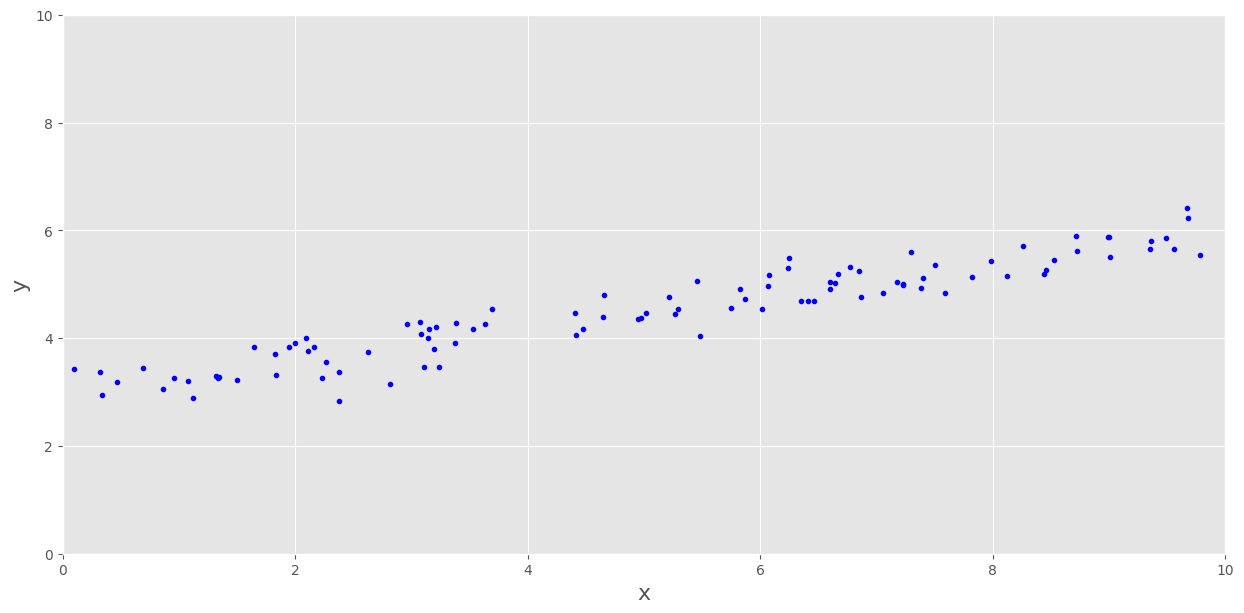

In [32]:
y_int = 3
slope = 0.3
X, y = create_linear_data(y_offset = y_int, slope = slope)
plot_data(X, y)

# **Fitting a Straight Line using Keras**



1.   **Create a Keras Model without bias term**



In [33]:
# Create a simple linear model with one parameter (the slope) to model a straight line that passes through the origin.
# The bias term for the neuron will be set to zero in this example
model = Sequential()
model.add(Dense(1, input_shape=(1, ), activation=None, use_bias=False))
model.summary()


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 1)              │             1 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1 (4.00 B)

 Trainable params: 1 (4.00 B)

 Non-trainable params: 0 (0.00 B)

In [34]:
# compile the model
model.compile(loss='mse', optimizer='adam')

In [35]:
# Train the model
history = model.fit(X, y, epochs=50, verbose=0)

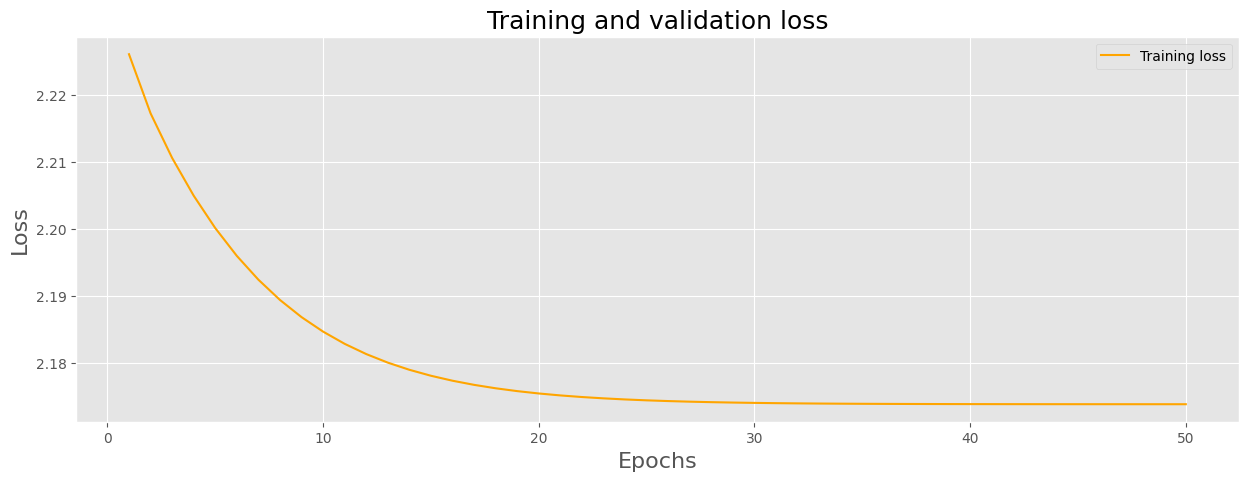

In [36]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [37]:
# Predict model parameters and display results
slope = model.layers[0].weights[0]
print('Slope: ', slope[0].numpy())

pred_y = model.predict(X)

Slope:  [0.7387096]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


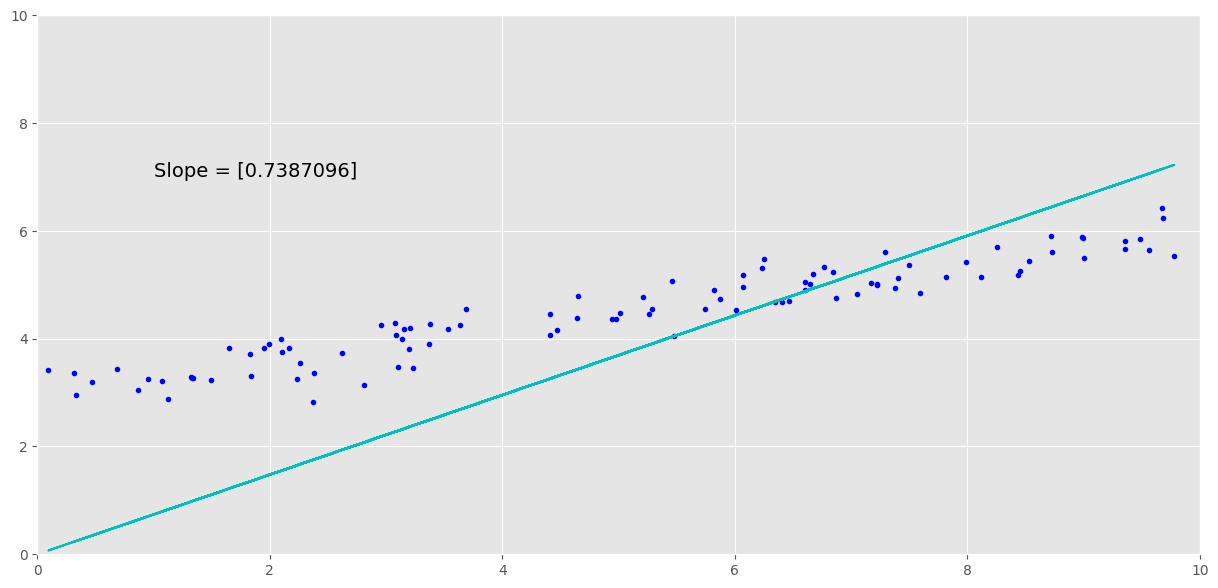

In [38]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize=14, family="Consolas")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()


2.   **Create a Keras Model with bias term**



In [39]:
model2 = Sequential()
model2.add(Dense(1, input_shape=(1, ), activation=None, use_bias=True))
model2.summary()

Model: "sequential_5"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_4 (Dense)                 │ (None, 1)              │             2 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2 (8.00 B)

 Trainable params: 2 (8.00 B)

 Non-trainable params: 0 (0.00 B)

In [40]:
# Compile the model
model2.compile(loss='mse', optimizer="adam")

In [41]:
# Train the model
history = model2.fit(X, y, epochs=2000, verbose=0)

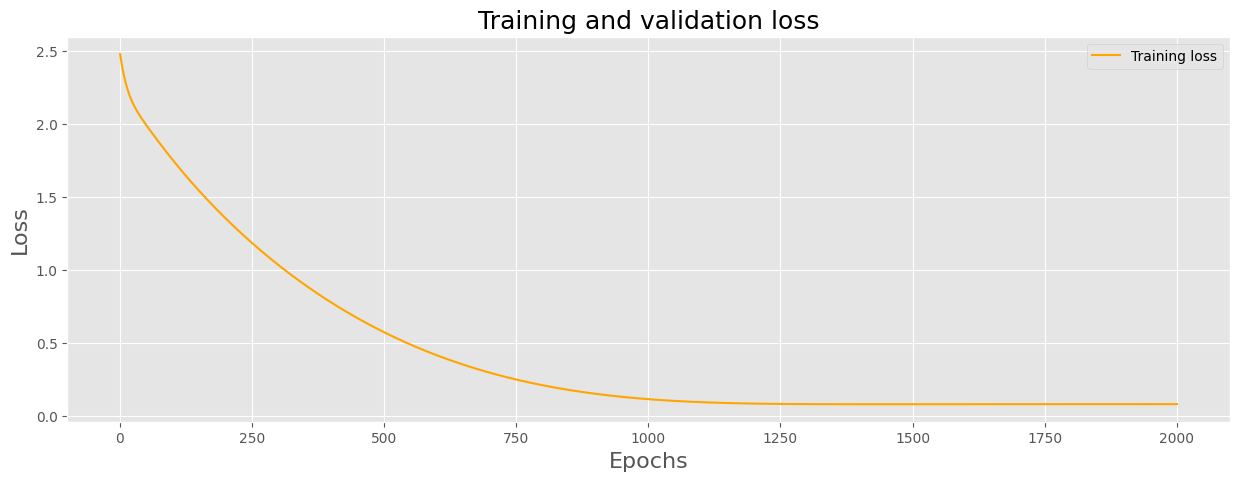

In [42]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [43]:
# Predict the model parameters and display the results
slope = model2.layers[0].weights[0]
y_int = model2.layers[0].weights[1]

print('Slope: ', slope[0].numpy())
print('Y-Int: ', y_int.numpy())

pred_y = model2.predict(X)

Slope:  [0.29190236]
Y-Int:  [3.0450315]
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step


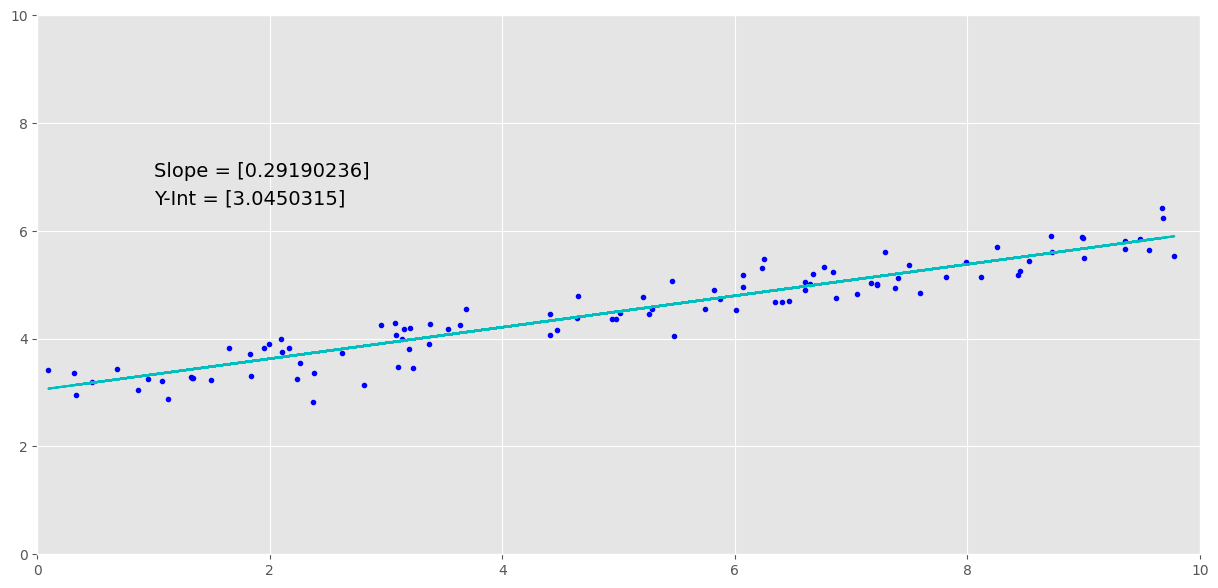

In [44]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(1, 7.0, 'Slope = ' + str(slope[0].numpy()), fontsize=14, family="Consolas")
plt.text(1, 6.5, 'Y-Int = ' + str(y_int.numpy()),    fontsize=14, family="Consolas")
plt.xlim(0, 10)
plt.ylim(0, 10)
plt.show()

#  Fitting Non-Linear Data using Keras

In [45]:
# In this section, we will use a single neuron to fit a non-linear mathematical function
def create_nonlinear_data(xmin=-10, xmax=10, num_data=100, theta_0=0, theta_1=.3, theta_2=.05, noise=.1):

  # Random manual seed for consistency.
  tf.random.set_seed(42)

  X = np.linspace(xmin, xmax, num=num_data)
  y = theta_0 + theta_1*X*np.cos(X) + theta_2*X**2 + noise*np.random.normal(size=num_data)

  X = tf.reshape(X, (len(X), 1))
  y = tf.reshape(y, (len(y), 1))

  return X, y

In [46]:
# Create some data (non-linear function, but linear in the parameters).
theta_0 = -3
theta_1 = .3
theta_2 = .05
X, y = create_nonlinear_data(theta_0=theta_0, theta_1=theta_1, theta_2=theta_2, noise=.3)
# Create two features from the input data that match the functional form of the data we generated above.
Xf = tf.concat((X*tf.math.cos(X), X*X), axis=1)
temp = Xf.numpy()
print('Xf contains two features based on X: ', temp.shape)

Xf contains two features based on X:  (100, 2)


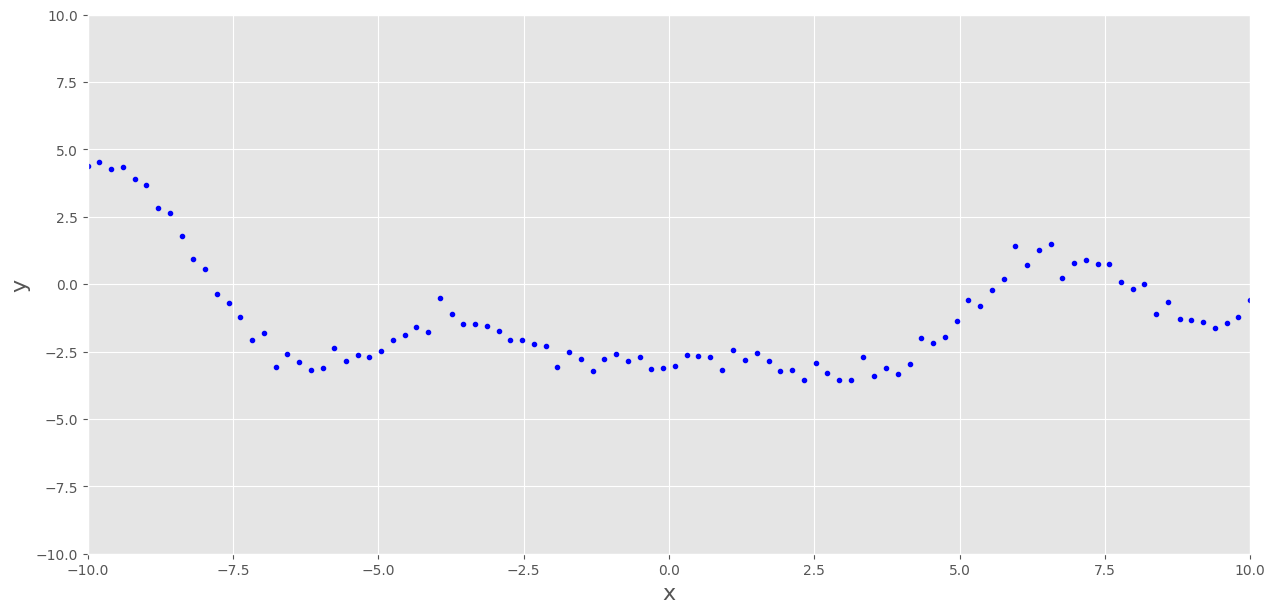

In [47]:
plot_data(X, y, (-10, 10), (-10, 10))

In [48]:
# Create Keras Model
model3 = Sequential()
model3.add(Dense(1, input_shape=(2,), activation=None, use_bias=True))
model3.summary()

Model: "sequential_6"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_5 (Dense)                 │ (None, 1)              │             3 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 3 (12.00 B)

 Trainable params: 3 (12.00 B)

 Non-trainable params: 0 (0.00 B)

In [49]:
# Compile the model
model3.compile(loss='mse', optimizer="adam")

In [50]:
# Train the model
history = model3.fit(Xf, y, epochs=2000, verbose=0)

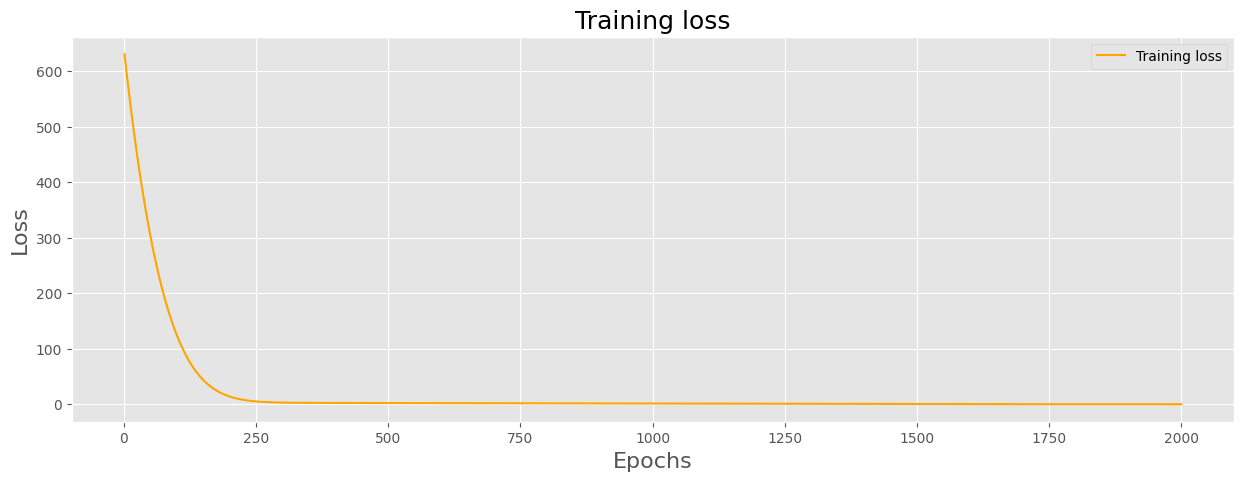

In [51]:
history_dict = history.history
loss_values = history_dict["loss"]
epochs = range(1, len(loss_values) + 1)

plt.figure(figsize=[15, 5])
plt.plot(epochs, loss_values, "orange", label="Training loss")
plt.title("Training loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [52]:
# Predict Model parameters and display results
pred_theta_0 = model3.layers[0].bias[0].numpy();
temp = model3.layers[0].weights[0].numpy();
pred_theta_1 = temp[0]
pred_theta_2 = temp[1]

print('Actual Coefficients:\n')
print('theta_0 = ', theta_0)
print('theta_1 = ', theta_1)
print('theta_2 = ', theta_2)
print('\n')
print('Predicted Coefficients:\n')
print('theta_0 = ', pred_theta_0)
print('theta_1 = ', pred_theta_1[0])
print('theta_2 = ', pred_theta_2[0])

pred_y = model3.predict(Xf)

Actual Coefficients:

theta_0 =  -3
theta_1 =  0.3
theta_2 =  0.05


Predicted Coefficients:

theta_0 =  -2.7191696
theta_1 =  0.3175161
theta_2 =  0.04582966
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


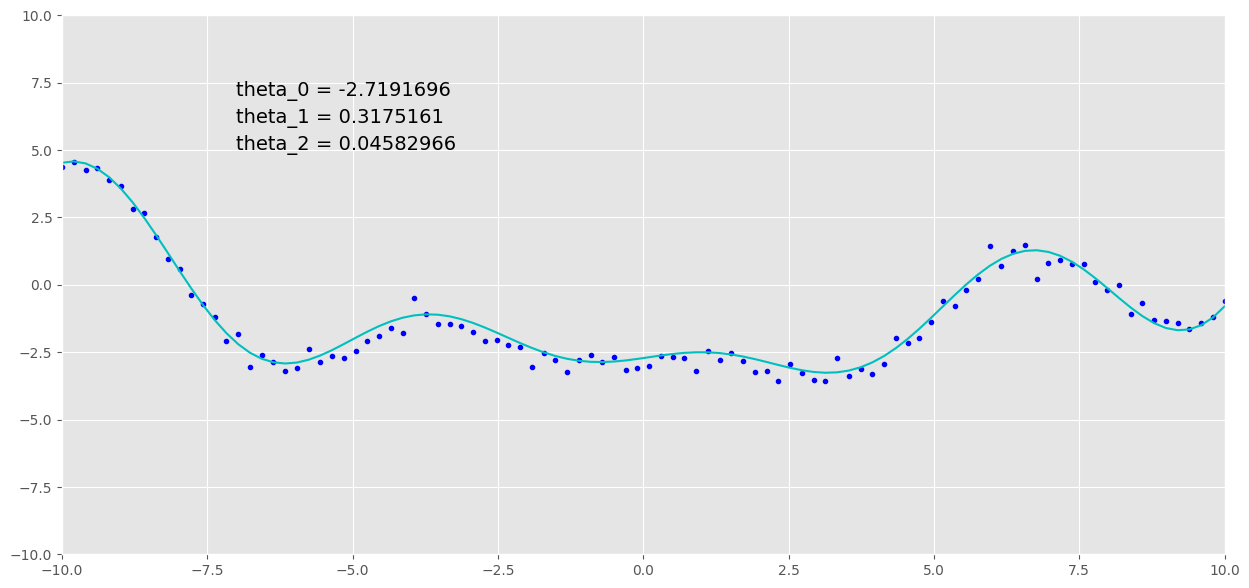

In [53]:
plt.plot(X, y, 'b.')
plt.plot(X, pred_y, 'c-')
plt.text(-7, 7.0, 'theta_0 = ' + str(pred_theta_0),    fontsize=14, family="Consolas")
plt.text(-7, 6.0, 'theta_1 = ' + str(pred_theta_1[0]), fontsize=14, family="Consolas")
plt.text(-7, 5.0, 'theta_2 = ' + str(pred_theta_2[0]), fontsize=14, family="Consolas")

plt.xlim(-10, 10)
plt.ylim(-10, 10)
plt.show()